In [2]:
#DATASET PROPUESTA #5 Banking_Dataset_Classification
#Se importa libreria Pandas y se lee archivo new_train.csv
import pandas as pd
df=pd.read_csv('new_train.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [9]:
df.shape

(32950, 16)

In [ ]:
# ESTE DATASET FUE TOMADO DE LA WEB kaggle. https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

# Este DataSet estudia la posibilidad de que un cliente de un banco se subcriba a realizar un depósito a plazo

# Tomando en cuenta age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, 
# pdays, previous, poutcome 

# age: edad del cliente
# job: profesion ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# marital: estado civil 
# education: formacion academica ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# default: si posee credito defaulteado ('no','yes','unknown')
# housing: si posee credito inmobiliario ('no','yes','unknown')
# loan: si posee un credito personal ('no','yes','unknown')
# contact: metodo de contacto ('cellular','telephone')
# month: ultimo mes de contacto realizado al cliente durante la campaña de marketing ('jan', 'feb', 'mar', …, 'nov', 'dec')
# day_of_week: ultimo contacto de la semana ('mon','tue','wed','thu','fri')
# duration: duracion del ultimo contacto en dicha llamada, en segundos
# campaign: numero de contactos realizados durante esta ultima campaña
# pdays: numero de dias que pasaron desde la ultima vez que fue contactado (999 means client was not previously contacted)
# previous: numero de contactos realizados a este cliente antes de la presente campaña
# poutcome: resultado de la campaña ('failure','nonexistent','success')
     
# La variable a predecir es y donde 1: se subscribio 0: no se subscribio.

# Este analisis servira para verificar si una persona sera propensa a realizar un depósito a plazo. Se buscara realizar un 
# algoritmo con ML(logistic regression, desicion tree, random forest) pora realizar esta predicción.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

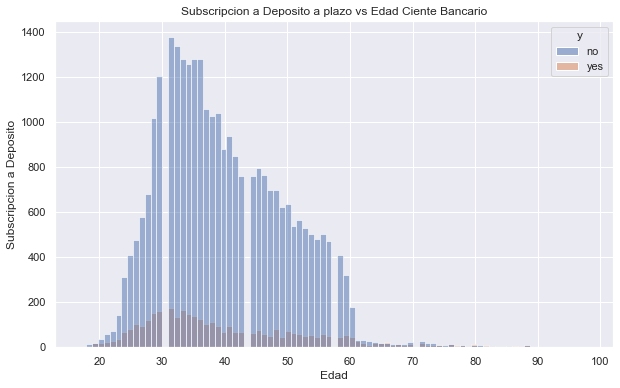

In [81]:
plt.figure(figsize=(10,6))
plt.title("Subscripcion a Deposito a plazo vs Edad Ciente Bancario")
plt.xlabel('Edad')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x='age',hue='y') #utilizando librerias seaborn para graficar
plt.show()
#Los clientes con edad entre 18-24 y 60-100 son aquellos que mas realizaron depositos a plazo porcentualmente

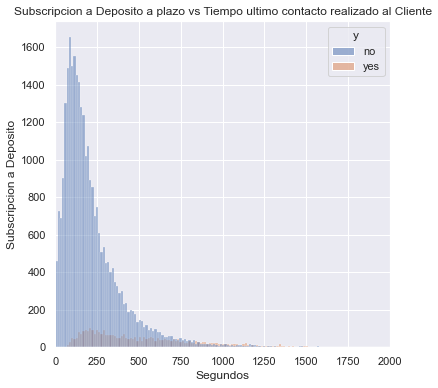

In [74]:
plt.figure(figsize=(6,6))
plt.title("Subscripcion a Deposito a plazo vs Tiempo ultimo contacto realizado al Cliente")
plt.xlabel('Segundos')
plt.ylabel('Subscripcion a Deposito')
plt.xlim(0,2000)
sns.histplot(data=df,x='duration',hue='y') #utilizando librerias seaborn para graficar
plt.show()
#Las llamadas a clientes con duracion menor a 100 segundos no concretaron con realizar depositos
#Las llamadas con duracion entre 500 segundos o mas tuvieron mas de un 50% de concretar en depositos.

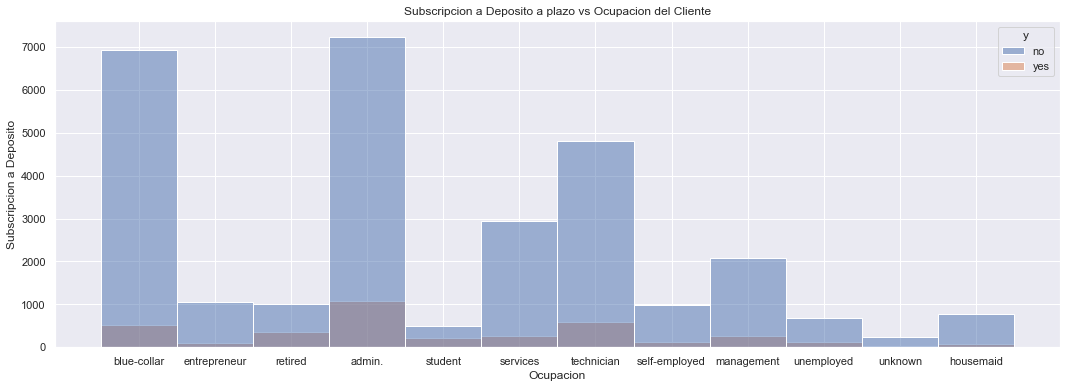

In [79]:
plt.figure(figsize=(18,6))
plt.title("Subscripcion a Deposito a plazo vs Ocupacion del Cliente")
plt.xlabel('Ocupacion')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x='job',hue='y') #utilizando librerias seaborn para graficar
plt.show()
#Los clientes con opucacion de Estudiante y Retirado tienen una mayor probabilidad de realizar depositos a plazo, los siguen
#clientes con empleos fijos en porcentaje.

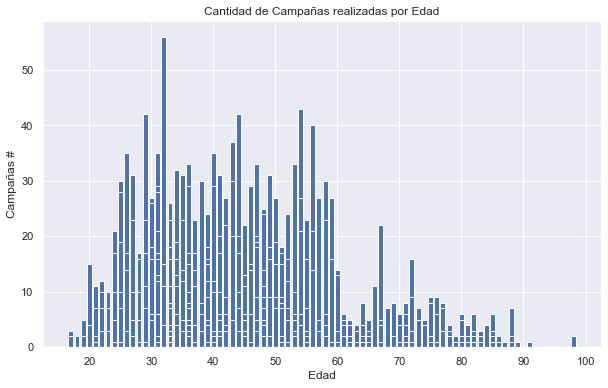

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
x=df.age
y=df.campaign
ax.bar(x,y)
ax.set(title ="Cantidad de Campañas realizadas por Edad") #Utilizando libreria matplot para graficar barras
ax.set_xlabel('Edad')
ax.set_ylabel('Campañas #')

plt.show()

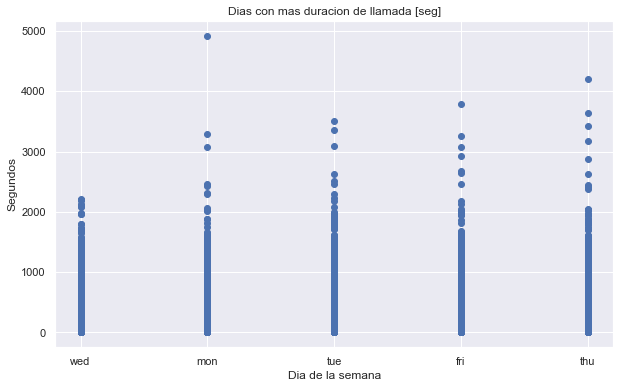

In [91]:
fig, ax = plt.subplots(figsize=(10, 6)) 
x=df.day_of_week
y=df.duration
ax.scatter(x,y) #Utilizando libreria matplot para graficar puntos, muestra cantidad de segundos de duracion de llamada por dia
ax.set(title ="Dias con mas duracion de llamada [seg]")
ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Segundos')
plt.show()

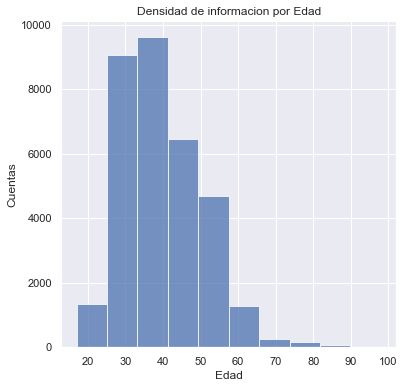

In [101]:
x=df['age']
plt.hist(x,alpha=0.75) # graficando para ver la densidad de informacion por edad.
plt.title("Densidad de informacion por Edad")
plt.xlabel('Edad')
plt.ylabel('Cuentas')
plt.show()